In [46]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from matplotlib.animation import FuncAnimation
import matplotlib
import scipy.sparse as sps
from tqdm import tqdm
# matplotlib.rcParams['figure.figsize'] = [8, 7]

In [47]:
import os
os.chdir(r'/Volumes/GoogleDrive/My Drive/Classroom/DTU/Special Course/Report/figures/NoDiff')

## Initializing the Mesh

In [48]:
domain_length = 1
meshsize = 1000

dx = domain_length/meshsize*np.ones((meshsize))

x = np.ones((meshsize))
x[0] = dx[0]/2
for i in range(1,meshsize):
    x[i] = x[i-1] + dx[i-1]/2+dx[i]/2

## Entering phase diagram properties

In [49]:
c0 = 2.1

ceut = 4.2
calpha = 2.1

Tf = 1537
Teut = 1153

Tliq = (Teut-Tf)/ceut*c0 + Tf
Tsol = (Teut-Tf)/calpha*c0+Tf

kpar = calpha/ceut
T_init_cast = Tliq

c = c0*np.ones((meshsize))
cinit = c.copy()
def cl(T, Tf=Tf, ceut=ceut, Teut=Teut):
    return (T-Tf)*ceut/(Teut-Tf)

In [50]:
total_t = 100000
dt = 0.5

t = np.arange(0,total_t,dt)

T = np.linspace(Tliq, Tsol, int(total_t/dt))

In [51]:
def simulateLever(x,c,t=t,T=T,k=kpar):
    
    inter = 0
    Scheil = [(c.copy(),0)]
    for i in tqdm(range(0,len(t))) :
        #Finding out the temperature
        temp = T[i]

        #Finding out the solid part
        isSolid = np.zeros((len(x)))
        isLiquid = np.zeros((len(x)))
        isSolid[0:inter] = 1

        # Finding the change in interface
        jump = 10   
        d_inter = jump
        change = 10

        while abs(change)>1:

            isLiquid[inter+d_inter:] = 1
            
            solid_change = np.sum(np.dot(isSolid,k*cl(temp))) - np.sum(np.dot(isSolid,c))
            liquid_change = np.sum(np.dot(isLiquid,cl(temp))) - np.sum(np.dot(isLiquid,c))
            
            inter_change = -(solid_change+liquid_change)
            d_inter_new = inter_change/((k-1)*cl(temp))
            change = d_inter_new-d_inter
            d_inter = round(d_inter_new)

        # Diffusion in solid and liquid

        if d_inter:    
            c[inter:inter+d_inter] = k*cl(temp)
            c[0:inter] = k*cl(temp)
            c[inter+d_inter:] = cl(temp)
            
        inter = inter + d_inter
        
        Scheil.append((c.copy(),inter))

        if inter+jump>len(x):
            print("Simulation finish")
            break
    return Scheil

In [52]:
def simulateScheil(x, c, t=t, T=T, k=kpar):

    inter = 0
    Scheil = [(c.copy(), 0)]
    for i in tqdm(range(0, len(t))):
        #Finding out the temperature
        temp = T[i]

        #Finding out the solid part
        isSolid = np.zeros((len(x)))
        isLiquid = np.zeros((len(x)))
        isSolid[0:inter] = 1

        # Finding the change in interface
        jump = 10
        d_inter = jump
        change = 10

        while abs(change) > 1:

            isLiquid[inter+d_inter:] = 1

            solid_change = 0
            liquid_change = np.sum(np.dot(isLiquid, cl(temp))) - np.sum(np.dot(isLiquid, c))

            inter_change = -(solid_change+liquid_change)
            d_inter_new = inter_change/((k-1)*cl(temp))
            change = d_inter_new-d_inter
            d_inter = round(d_inter_new)

        # Diffusion in solid and liquid

        if d_inter:
            #Interface
            c[inter:inter+d_inter] = k*cl(temp)
            #Solid diffusion

            #Liquid Diffusion
            c[inter+d_inter:] = cl(temp)

        inter = inter + d_inter

        Scheil.append((c.copy(), inter))

        if inter+jump > len(x):
            print("Simulation finish")
            break
    return Scheil


In [53]:
Scheil = simulateScheil(x.copy(),c.copy())
tf_scheil = (len(Scheil)-1)*dt

100%|██████████| 200000/200000 [00:09<00:00, 20981.86it/s]


In [54]:
Lever = simulateLever(x.copy(), c.copy())
tf_lever = (len(Lever)-1)*dt

 41%|████      | 82170/200000 [00:06<00:09, 12449.16it/s]


Simulation finish


In [55]:
domain_length = 1
meshsize = 100

dx = domain_length/meshsize*np.ones((meshsize))

x2 = np.ones((meshsize))
x2[0] = dx[0]/2
for i in range(1, meshsize):
    x2[i] = x2[i-1] + dx[i-1]/2+dx[i]/2

In [56]:
c0 = 2.1

ceut = 4.2
calpha = 2.1

Tf = 1537
Teut = 1153

Tliq = (Teut-Tf)/ceut*c0 + Tf
Tsol = (Teut-Tf)/calpha*c0+Tf

kpar = calpha/ceut
T_init_cast = Tliq

c2 = c0*np.ones((meshsize))
cinit = c2.copy()


def cl(T, Tf=Tf, ceut=ceut, Teut=Teut):
    return (T-Tf)*ceut/(Teut-Tf)

In [57]:
Scheil2 = simulateScheil(x2.copy(),c2.copy())
tf_scheil2 = (len(Scheil2)-1)*dt

 81%|████████  | 161799/200000 [00:06<00:01, 23868.60it/s]

Simulation finish


In [58]:
Lever2 = simulateLever(x2.copy(), c2.copy())
tf_lever2 = (len(Lever2)-1)*dt

 35%|███▌      | 70827/200000 [00:04<00:08, 15670.13it/s]

Simulation finish


In [59]:
interface_Lever = np.zeros(len(Lever))
for i in range(0, len(Lever)):
    interface_Lever[i] = Lever[i][1]

In [60]:
interface_Scheil = np.zeros(len(Scheil))
for i in range(0,len(Scheil)):
    interface_Scheil[i] = Scheil[i][1]

41085.5


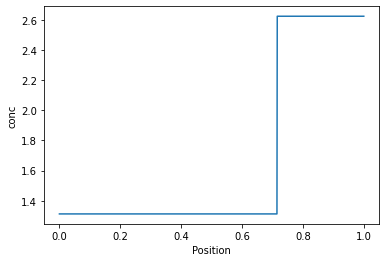

In [61]:
plt.plot(x,Lever[50000][0])
plt.xlabel('Position')
plt.ylabel('conc')
print(tf_lever)
plt.savefig('Lever prof.png',bbox_inches='tight',dpi = 400)

100000.0


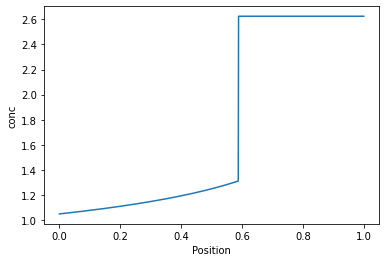

In [62]:
plt.plot(x,Scheil[50000][0])
plt.xlabel('Position')
plt.ylabel('conc')
print(tf_scheil)
plt.savefig('Scheil prof.png', bbox_inches='tight', dpi=400)


In [63]:
lever_Loss = []
scheil_Loss = []
for i in range(len(Lever)):
    loss = np.average(Lever[i][0]-c)
    lever_Loss.append(loss)
for i in range(len(Scheil)):
    loss = np.average(Scheil[i][0]-c)
    scheil_Loss.append(loss)
t_lever = t[0:len(lever_Loss)]
t_scheil = t[0:len(scheil_Loss)]

In [64]:
lever_Loss2 = []
scheil_Loss2 = []
for i in range(len(Lever2)):
    loss2 = np.average(Lever2[i][0]-c2)
    lever_Loss2.append(loss2)
for i in range(len(Scheil2)):
    loss2 = np.average(Scheil2[i][0]-c2)
    scheil_Loss2.append(loss2)
t_lever2 = t[0:len(lever_Loss2)]
t_scheil2 = t[0:len(scheil_Loss2)]

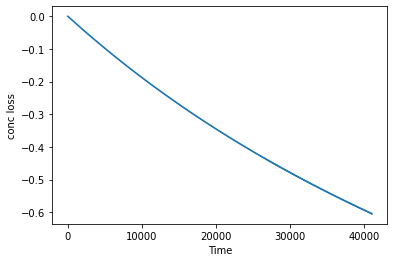

In [65]:
plt.plot(t_lever,lever_Loss)
# plt.plot(t_lever2,lever_Loss2)
plt.xlabel('Time')
plt.ylabel('conc loss')
plt.savefig('Lever loss.png', bbox_inches='tight', dpi=400)


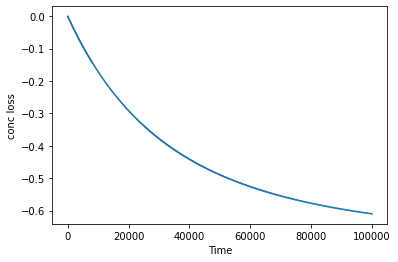

In [66]:
plt.plot(t_scheil, scheil_Loss[:-1])
# plt.plot(t_scheil2, scheil_Loss2)
plt.xlabel('Time')
plt.ylabel('conc loss')
plt.savefig('Scheil loss.png', bbox_inches='tight', dpi=400)

In [67]:
print(np.average(Lever[50000][0]))
print(np.average(Scheil[50000][0]))

1.685957021035104
1.7618784066420337
